In [ ]:
cd drive/My\ Drive/ML_hw

/content/drive/My Drive/ML_hw


In [ ]:
pwd

'/content/drive/My Drive/ML_hw'

In [3]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

In [4]:
!ls

iris.data  sample_data


In [5]:
df = pd.read_csv('iris.data')

In [6]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df = df.replace('Iris-setosa', 0)
df = df.replace('Iris-versicolor', 1)
df = df.replace('Iris-virginica', 2)

In [11]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [54]:
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 

In [150]:
def gen_data(x, y, tar):
  n0 = np.sum(y == 0)
  n1 = np.sum(y == 1)
  n2 = np.sum(y == 2)

  y_ = y.copy()
  if tar != -1:
    index1 = np.where(y == tar)
    y_[index1] = 1
    index2 = np.where(y != tar)
    y_[index2] = 0

  # 随机划分训练集和测试集
  num = x.shape[0]
  ratio = 7/3
  num_test = int(num/(1+ratio))
  num_train = num - num_test

  # 打乱并划分
  index = np.arange(num)
  np.random.shuffle(index)
  x_test = x[index[:num_test],:]
  y_test = y_[index[:num_test]]
  x_train = x[index[num_test:],:]
  y_train = y_[index[num_test:]]

  return x_train, y_train, x_test, y_test


In [151]:
iris = datasets.load_iris() 
print(type(iris), dir(iris))

x = iris.get('data')
y = iris.get('target')

x_train0, y_train0, x_test0, y_test0 = gen_data(x, y, 0)
x_train1, y_train1, x_test1, y_test1 = gen_data(x, y, 1)
x_train2, y_train2, x_test2, y_test2 = gen_data(x, y, 2)

clf_linear0 = svm.SVC()
clf_linear0.fit(x_train0, y_train0)

y_test_pre_linear0 = clf_linear0.predict(x_test0)

# 计算准确率
acc_linear0 = sum(y_test_pre_linear0==y_test0)/len(y_test0)
print('class 0 against rest: The accuracy0 is', acc_linear0) 

clf_linear1 = svm.SVC()
clf_linear1.fit(x_train1, y_train1)

y_test_pre_linear1 = clf_linear1.predict(x_test1)

# 计算准确率
acc_linear1 = sum(y_test_pre_linear1==y_test1)/len(y_test1)
print('class 1 against rest: The accuracy1 is', acc_linear1) 

clf_linear2 = svm.SVC()
clf_linear2.fit(x_train2, y_train2)

y_test_pre_linear2 = clf_linear2.predict(x_test2)

# 计算准确率
acc_linear2 = sum(y_test_pre_linear2==y_test2)/len(y_test2)
print('class 2 against rest: The accuracy2 is', acc_linear2) 

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
class 0 against rest: The accuracy0 is 1.0
class 1 against rest: The accuracy1 is 0.9111111111111111
class 2 against rest: The accuracy2 is 0.9555555555555556


In [152]:
i = np.where(y == 2)
i

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),)

In [163]:
x_train, y_train, x_test, y_test = gen_data(x, y, -1)

knn = KNeighborsClassifier() 
knn.fit(x_train, y_train)

iris_y_predict = knn.predict(x_test) 
probility=knn.predict_proba(x_test)
score=knn.score(x_test,y_test,sample_weight=None)

print('y_predict = ',iris_y_predict)
print('y_test = ', y_test)
print('The accuracy is:' ,score)

y_predict =  [0 0 2 1 1 0 1 1 1 2 0 1 0 2 1 1 0 0 2 0 2 1 0 1 0 2 1 0 2 1 1 1 2 0 1 0 0
 1 1 0 0 0 2 0 1]
y_test =  [0 0 2 1 1 0 1 1 2 2 0 1 0 2 1 1 0 0 2 0 2 1 0 1 0 2 1 0 1 1 1 1 2 0 1 0 0
 1 1 0 0 0 2 0 1]
The accuracy is: 0.9555555555555556


In [154]:
y_test

array([1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0,
       2])

In [155]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD,Adam

In [156]:
x_train0

array([[6.4, 3.2, 5.3, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [7.3, 2.9, 6.3, 1.8],
       [5.8, 4. , 1.2, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5. , 2. , 3.5, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [5.2, 4.1, 1.5, 0.1],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.5, 4.9, 1.5],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [4.9, 3.1, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.1, 3.3, 1.7, 0.5],
       [7.2, 3.2, 6. , 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.9, 3.1, 5.4, 2.1],
       [6. , 2.9, 4.5, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.5, 3

In [157]:
# x_train0, y_train0, x_test0, y_test0
e = 200

y_train0 = y_train0.reshape(len(y_train0),1)
y_test0 = y_test0.reshape(len(y_test0),1)

y_train1 = y_train1.reshape(len(y_train1),1)
y_test1 = y_test1.reshape(len(y_test1),1)

y_train2 = y_train2.reshape(len(y_train2),1)
y_test2 = y_test2.reshape(len(y_test2),1)

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 865us/step - loss: 0.2627 - accuracy: 0.3905 - val_loss: 0.2861 - val_accuracy: 0.2000
Epoch 2/200
105/105 [==============================] - 0s 231us/step - loss: 0.2567 - accuracy: 0.3905 - val_loss: 0.2783 - val_accuracy: 0.2000
Epoch 3/200
105/105 [==============================] - 0s 219us/step - loss: 0.2529 - accuracy: 0.3905 - val_loss: 0.2680 - val_accuracy: 0.2000
Epoch 4/200
105/105 [==============================] - 0s 209us/step - loss: 0.2481 - accuracy: 0.3905 - val_loss: 0.2589 - val_accuracy: 0.2000
Epoch 5/200
105/105 [==============================] - 0s 208us/step - loss: 0.2439 - accuracy: 0.3905 - val_loss: 0.2535 - val_accuracy: 0.2000
Epoch 6/200
105/105 [==============================] - 0s 203us/step - loss: 0.2415 - accuracy: 0.4000 - val_loss: 0.2459 - val_accuracy: 0.4889
Epoch 7/200
105/105 [==============================] - 0s 202us/step - loss: 0.2385 -

Text(0.5, 1.0, 'Traing and Validation accuracy')

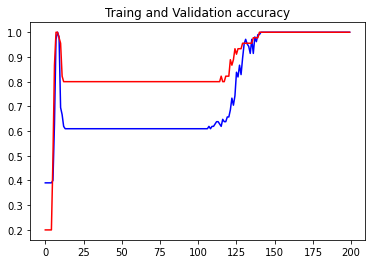

In [158]:
model0 = Sequential()

model0.add(Dense(10, input_shape=((4,)), activation='sigmoid'))
model0.add(Dense(10, activation='sigmoid'))
model0.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6)
model0.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

history0 = model0.fit(x_train0, y_train0, validation_data=(x_test0, y_test0), epochs=e, batch_size=8)

epochs0 = range(len(history0.history['accuracy']))

plt.plot(epochs0,history0.history['accuracy'],'b',label='Training acc')
plt.plot(epochs0,history0.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy')

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 860us/step - loss: 0.2514 - accuracy: 0.4190 - val_loss: 0.2506 - val_accuracy: 0.5556
Epoch 2/200
105/105 [==============================] - 0s 213us/step - loss: 0.2492 - accuracy: 0.6095 - val_loss: 0.2461 - val_accuracy: 0.7111
Epoch 3/200
105/105 [==============================] - 0s 224us/step - loss: 0.2464 - accuracy: 0.6476 - val_loss: 0.2421 - val_accuracy: 0.7111
Epoch 4/200
105/105 [==============================] - 0s 218us/step - loss: 0.2437 - accuracy: 0.6476 - val_loss: 0.2385 - val_accuracy: 0.7111
Epoch 5/200
105/105 [==============================] - 0s 216us/step - loss: 0.2414 - accuracy: 0.6476 - val_loss: 0.2352 - val_accuracy: 0.7111
Epoch 6/200
105/105 [==============================] - 0s 207us/step - loss: 0.2396 - accuracy: 0.6476 - val_loss: 0.2337 - val_accuracy: 0.7111
Epoch 7/200
105/105 [==============================] - 0s 215us/step - loss: 0.2386 -

Text(0.5, 1.0, 'Traing and Validation accuracy')

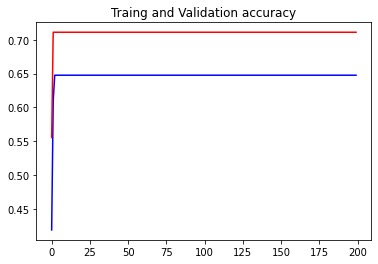

In [160]:
model1 = Sequential()

model1.add(Dense(10, input_shape=((4,)), activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6)
model1.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

history1 = model1.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=e, batch_size=8)

epochs1 = range(len(history1.history['accuracy']))

plt.plot(epochs1,history1.history['accuracy'],'b',label='Training acc')
plt.plot(epochs1,history1.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy')

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 210us/step - loss: 0.3270 - accuracy: 0.3429 - val_loss: 0.3233 - val_accuracy: 0.3111
Epoch 2/200
105/105 [==============================] - 0s 216us/step - loss: 0.3240 - accuracy: 0.3429 - val_loss: 0.3206 - val_accuracy: 0.3111
Epoch 3/200
105/105 [==============================] - 0s 211us/step - loss: 0.3215 - accuracy: 0.3429 - val_loss: 0.3162 - val_accuracy: 0.3111
Epoch 4/200
105/105 [==============================] - 0s 224us/step - loss: 0.3182 - accuracy: 0.3429 - val_loss: 0.3120 - val_accuracy: 0.3111
Epoch 5/200
105/105 [==============================] - 0s 219us/step - loss: 0.3152 - accuracy: 0.3429 - val_loss: 0.3081 - val_accuracy: 0.3111
Epoch 6/200
105/105 [==============================] - 0s 211us/step - loss: 0.3122 - accuracy: 0.3714 - val_loss: 0.3058 - val_accuracy: 0.3111
Epoch 7/200
105/105 [==============================] - 0s 209us/step - loss: 0.3103 -

Text(0.5, 1.0, 'Traing and Validation accuracy')

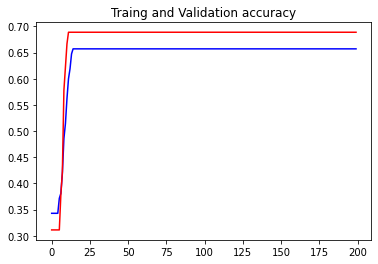

In [161]:

model2 = Sequential()

model2.add(Dense(10, input_shape=((4,)), activation='sigmoid'))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6)
model2.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

history2 = model0.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), epochs=200, batch_size=8)

epochs2 = range(len(history2.history['accuracy']))

plt.plot(epochs2,history2.history['accuracy'],'b',label='Training acc')
plt.plot(epochs2,history2.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy')

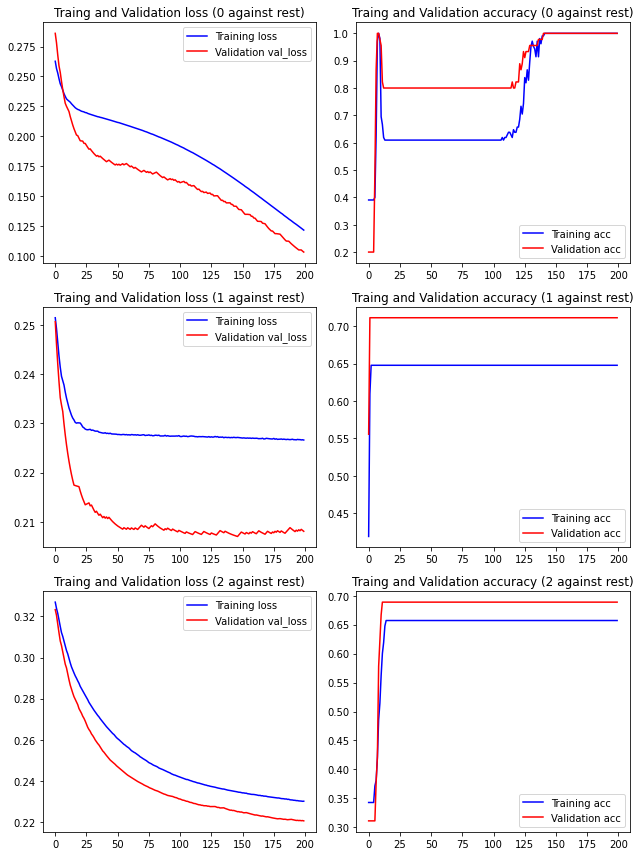

In [164]:
fig = plt.figure(figsize=(9, 12))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal', adjustable='box')


plt.subplot(321)
plt.plot(epochs0,history0.history['loss'],'b',label='Training loss')
plt.plot(epochs0,history0.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing and Validation loss (0 against rest)')
plt.legend()
plt.tight_layout()
# ax = plt.gca()
# ax.set_aspect(1)

plt.subplot(322)
plt.plot(epochs0,history0.history['accuracy'],'b',label='Training acc')
plt.plot(epochs0,history0.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy (0 against rest)')
plt.legend()
plt.tight_layout()

plt.subplot(323)
plt.plot(epochs1,history1.history['loss'],'b',label='Training loss')
plt.plot(epochs1,history1.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing and Validation loss (1 against rest)')
plt.legend()
plt.tight_layout()
# ax = plt.gca()
# ax.set_aspect(1)

plt.subplot(324)
plt.plot(epochs1,history1.history['accuracy'],'b',label='Training acc')
plt.plot(epochs1,history1.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy (1 against rest)')
plt.legend()
plt.tight_layout()

plt.subplot(325)
plt.plot(epochs2,history2.history['loss'],'b',label='Training loss')
plt.plot(epochs2,history2.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing and Validation loss (2 against rest)')
plt.legend()
plt.tight_layout()
# ax = plt.gca()
# ax.set_aspect(1)

plt.subplot(326)
plt.plot(epochs2,history2.history['accuracy'],'b',label='Training acc')
plt.plot(epochs2,history2.history['val_accuracy'],'r',label='Validation acc')
plt.title('Traing and Validation accuracy (2 against rest)')
plt.legend()
plt.tight_layout()

plt.savefig('6_result.svg')

In [173]:
x = np.asarray([[.697,.460],
 [.774,.376],
 [.634,.264],
 [.608,.318],
 [.556,.215],
 [.403,.237],
  [.481,.149],
  [.437,.211],
  [.666,.091],
  [.243,.267],
  [.245,.057],
  [.343,.099],
  [.639,.161],
  [.657,.198],
  [.360,.370],
  [.593,.042],
 [.719,.103]
 ])

In [182]:
def draw(x, y, m='.'):
  p = []
  n = []
  for i in range(len(x)):
    if y[i] > 0.5:
      p.append(x[i])
    else:
      n.append(x[i])
  p = np.asarray(p)
  n = np.asarray(n)
  if p.size > 0:
    plt.scatter(p[:, 0], p[:, 1], c='b', marker=m)
  if n.size > 0:
    plt.scatter(n[:, 0], n[:, 1], c='r', marker=m)

In [ ]:
def draw_v(x, m='.'):
    plt.scatter(n[:, 0], n[:, 1], c='r', marker=m)

In [183]:
y = np.asarray([1]*8+[0]*9)

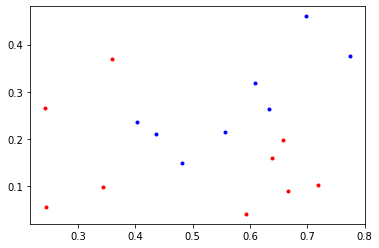

In [184]:
draw(x,y)

In [212]:
clf_linear = svm.SVC(kernel="linear")
clf_rbf = svm.SVC(kernel="rbf")
clf_linear.fit(x, y)
clf_rbf.fit(x, y)

y_test_pre_linear = clf_linear.predict(x)
y_test_pre_rbf = clf_rbf.predict(x)


# 计算分类准确率
acc_linear = sum(y_test_pre_linear==y)/len(y)
print('linear kernel: The accuracy is', acc_linear) 
acc_rbf = sum(y_test_pre_rbf==y)/len(y)
print('rbf kernel: The accuracy is', acc_rbf) 

linear kernel: The accuracy is 0.5294117647058824
rbf kernel: The accuracy is 0.9411764705882353


In [ ]:
dir(clf_linear)

array([[0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


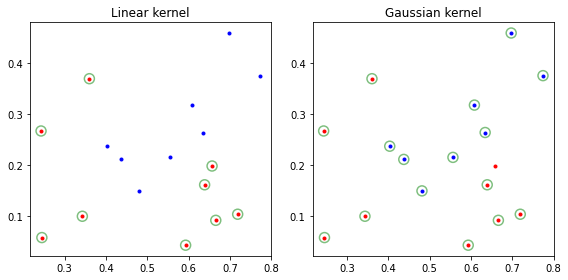

In [218]:
v1 = clf_linear.support_vectors_
v2 = clf_rbf.support_vectors_


fig = plt.figure(figsize=(8, 4))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal', adjustable='box')


plt.subplot(121)
plt.title('Linear kernel')
draw(x,y)
plt.scatter(x[y_test_pre_linear==y][:, 0], x[y_test_pre_linear==y][:, 1], s=100, c = '', alpha=0.5, linewidth=1.5, edgecolor='g')
plt.tight_layout()
# ax = plt.gca()
# ax.set_aspect(1)

plt.subplot(122)
plt.title('Gaussian kernel')
draw(x,y)
plt.scatter(x[y_test_pre_rbf==y][:, 0], x[y_test_pre_rbf==y][:, 1], s=100, c = '', alpha=0.5, linewidth=1.5, edgecolor='g')
plt.tight_layout()
# ax = plt.gca()
# ax.set_aspect(1)
plt.savefig('6_svm.svg')

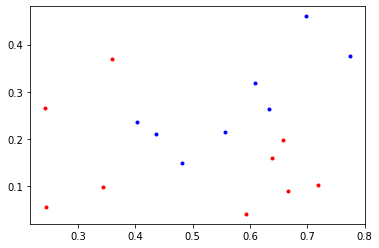

In [200]:
draw(x,y)